<a href="https://colab.research.google.com/github/Nivedhasriram/Machine-Learning-and-Algorithms/blob/main/KNN_Classifier(Assignment_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import csv
import math
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
iris = pd.read_csv('iris.csv').values
print(iris)

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [5.4 3.4 1.7 0.2 'setosa']
 [5.1 3.7 1.5 0.4 'setosa']
 [4.6 3.6 1.0 0.2 'setosa']
 [5.1 3.3 1.7 0.5 'setosa']
 [4.8 3.4 1.9 0.2 'setosa']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.0 3.4 1.6 0.4 'setosa']
 [5.2 3.5 1.5 0.2 'setosa']
 [5.2 3.4 1.4 0.2 'setosa']
 [4.7 3.2 1.6 0.2 'setosa']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 4.1 1.5 0.1 'setosa']
 [5.5 4.2 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.2 'setosa']
 [5.0 3.2 1.2 0.2 's

In [14]:
np.random.shuffle(iris)
label_map = {label:idx for idx,label in enumerate(np.unique(iris[:,-1]))}
y = np.array([label_map[label] for label in iris[:,-1]])

In [20]:
x = iris[:,:-1]

In [19]:
split = int(0.8 * len(iris))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [17]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [30]:
def knn(x_train,y_train,x_test,k):
  predictions = []
  for test in x_test:
    distances = []
    for i in range(len(x_train)):
      dist = euclidean_distance(test,x_train[i])
      distances.append((dist,y_train[i]))
    distances.sort(key = lambda x:x[0])
    k_neighbors = distances[:k]
    k_labels = [label for _,label in k_neighbors]
    common = Counter(k_labels).most_common(1)[0][0]
    predictions.append(common)
  return np.array(predictions)

In [28]:
def accuracy(y_true,y_pred):
  acc = np.sum(y_true == y_pred) / len(y_true)
  return acc

In [23]:
def confusion_matrix(y_true, y_pred):
  unique_labels = np.unique(y_true)
  num_labels = len(unique_labels)
  confusion_matrix = np.zeros((num_labels, num_labels), dtype=int)
  for i in range(len(y_true)):
    confusion_matrix[int(y_true[i]),int(y_pred[i])] += 1
  return confusion_matrix

In [32]:
k = 5
y_pred = knn(x_train,y_train,x_test,k)

In [33]:
accuracy_score = accuracy(y_test,y_pred)
print(f"Accuracy: {accuracy_score:.2f}")

Accuracy: 0.97


In [34]:
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[ 6  0  0]
 [ 0 11  0]
 [ 0  1 12]]


In [37]:
k_values = range(1, 10)
accuracies = []
for k in k_values:
    y_pred = knn(x_train, y_train, x_test, k)
    accuracy_score = accuracy(y_test, y_pred)
    accuracies.append(accuracy_score)

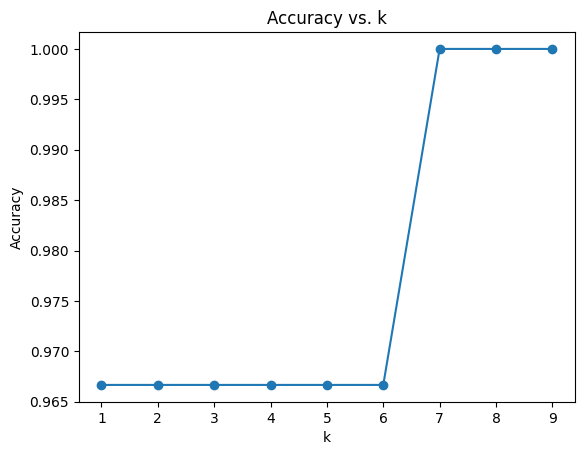

In [38]:
plt.plot(k_values, accuracies,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.show()

In [39]:
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal k: {optimal_k}")

Optimal k: 7
